# Lectura y Análisis de Datos para Cálculo Numérico

## Introducción

En cálculo numérico, la capacidad de leer, procesar y analizar datos es fundamental. 

Esta clase se enfocará en cómo utilizar Python para leer diferentes formatos de datos y realizar análisis numéricos básicos.

## Importación de librerías

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

## Lectura de Datos

### 1. Lectura de CSV con Pandas

In [25]:
# Suponiendo que tenemos un archivo 'datos_numericos.csv'
df = pd.read_csv('datos_numericos.csv')
print(df.head())

# Convertir a array de NumPy para cálculos más eficientes
data_array = df.values

     x    y    z
0  1.2  3.4  5.6
1  2.3  4.5  6.7
2  3.4  5.6  7.8
3  4.5  6.7  8.9
4  5.6  7.8  9.0


### 2. Lectura de datos desde Excel

In [26]:
# Suponiendo que tenemos un archivo 'datos_numericos.xlsx'
df_excel = pd.read_excel('datos_numericos.xlsx', sheet_name='Sheet1')
print(df_excel.head())

   variable_independiente  variable_dependiente  columna_numerica  \
0                 0.00000              0.496714                 9   
1                 0.10101             -0.037254                62   
2                 0.20202              0.849709                37   
3                 0.30303              1.826060                97   
4                 0.40404              0.169887                51   

   columna_positiva  
0          9.375525  
1          9.700983  
2          2.591838  
3         10.936029  
4          9.516644  


## Análisis Numérico Básico

### 1. Estadísticas Descriptivas

In [38]:
df = df_excel
print(df.describe())

# Calcular media y desviación estándar de una columna específica
mean = np.mean(df['columna_numerica'])
std_dev = np.std(df['columna_numerica'])
print(f"Media: {mean}, Desviación Estándar: {std_dev}")

       variable_independiente  variable_dependiente  columna_numerica  \
count              100.000000            100.000000        100.000000   
mean                 5.000000              4.896153         49.660000   
std                  2.930454              3.106321         31.001212   
min                  0.000000             -0.600149          1.000000   
25%                  2.500000              2.217051         20.000000   
50%                  5.000000              4.836175         52.000000   
75%                  7.500000              7.765663         73.500000   
max                 10.000000             10.160564         99.000000   

       columna_positiva  
count        100.000000  
mean           5.298661  
std            5.518182  
min            0.025992  
25%            1.729842  
50%            3.329394  
75%            6.993802  
max           26.061167  
Media: 49.66, Desviación Estándar: 30.845816572105857


### 2. Correlación entre variables

In [39]:
correlation_matrix = df.corr()
print(correlation_matrix)

                        variable_independiente  variable_dependiente  \
variable_independiente                1.000000              0.956396   
variable_dependiente                  0.956396              1.000000   
columna_numerica                     -0.069104             -0.044130   
columna_positiva                     -0.208264             -0.215130   

                        columna_numerica  columna_positiva  
variable_independiente         -0.069104         -0.208264  
variable_dependiente           -0.044130         -0.215130  
columna_numerica                1.000000          0.045930  
columna_positiva                0.045930          1.000000  


### 3. Regresión Lineal

In [40]:
x = df['variable_independiente']
y = df['variable_dependiente']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Pendiente: {slope}")
print(f"Intercepto: {intercept}")
print(f"Coeficiente de correlación: {r_value}")

Pendiente: 1.0137932673366565
Intercepto: -0.17281285407737723
Coeficiente de correlación: 0.9563964230419769


### 4. Transformación de Datos

In [43]:
# Normalización de datos
df= (df - df.mean()) / df.std()

# Aplicar una función a una columna
df['log_columna'] = np.log(df['columna_positiva'])
df

/home/lgomez/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,variable_independiente,variable_dependiente,columna_numerica,columna_positiva,log_columna
0,-1.706220,-1.416286,-1.311562,0.738806,-0.302720
1,-1.671751,-1.588183,0.398049,0.797785,-0.225916
2,-1.637282,-1.302649,-0.408371,-0.490528,NaN
3,-1.602813,-0.988337,1.527037,1.021599,0.021369
4,-1.568344,-1.521500,0.043224,0.764379,-0.268691
...,...,...,...,...,...
95,1.568344,1.041841,-0.569655,-0.924329,NaN
96,1.602813,1.640827,-1.311562,-0.632800,NaN
97,1.637282,1.662057,1.591551,-0.262338,NaN
98,1.671751,1.612180,-0.988994,-0.601865,NaN


## Visualización de Datos

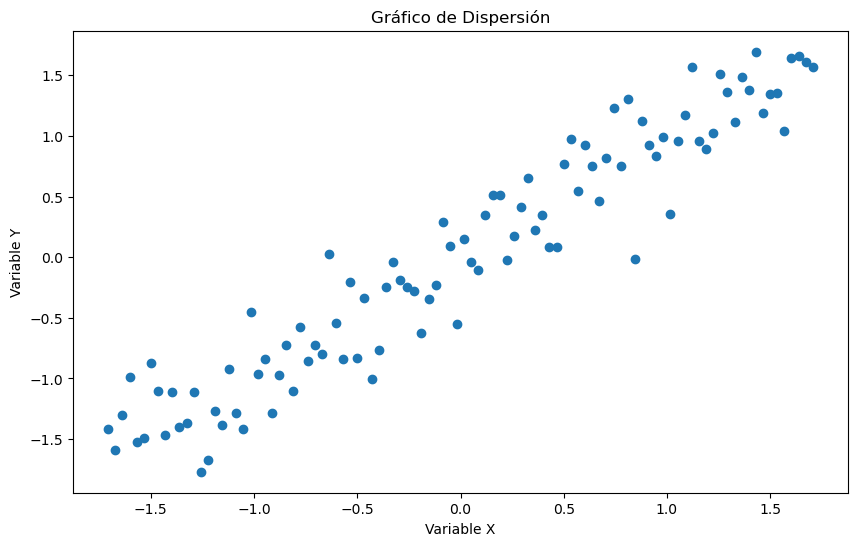

In [44]:
df['x']=df['variable_independiente']
df['y']=df['variable_dependiente']

plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

## Guardado de Resultados

In [30]:
# Guardar resultados en CSV
df_resultados = pd.DataFrame({
    'x': x,
    'y': y,
    'y_pred': slope * x + intercept
})
df_resultados.to_csv('resultados_regresion.csv', index=False)

## Ejercicio Práctico

1. Carga el conjunto de datos 'iris' de scikit-learn.
2. Realiza un análisis estadístico básico de las características.
3. Encuentra la correlación entre la longitud del sépalo y la longitud del pétalo.
4. Realiza una regresión lineal entre estas dos características.
5. Visualiza los resultados y guárdalos en un archivo CSV.

Este ejercicio permitirá a los estudiantes practicar la lectura de datos, el análisis estadístico básico, la regresión lineal y la visualización de resultados, todos elementos importantes en el cálculo numérico.


## Lectura y escritura de datos 

lo primero que hacemos es importar las librerías con las que trabajaresmos y que tienen las funciones que necesitamos 

In [2]:
import pandas as pd
import numpy as np
import os
import csv
import urllib3

%config IPCompleter.greedy=True

#conda install xlwt para escribir archivos excel 

In [3]:
url='../../datasets/'
dataset='titanic/titanic3.csv'

## os.path.join es una función que uno y soluciona problemas de path como fañta de / o espacios
dataset=os.path.join(url,dataset)

## lectura CSV utilizando Pandas

### pd.read_csv()  

- **sep    :** separador de valores por ejemplo ',' o ';' 
- **dtype  :** tipo de datos en cada columna {nombre:tipo dato} # util para columnas con fechas  
- **header :** posición de la cabecera donde el número indica la linea por defecto es 0
- **names   :** nombre de las columnas creando una lista o array con los valores ={'nombre1', 'nombre2', ...}  
- **skiprows        :** número de filas que se salta por ejemplo 12 implica que parte de la fila 13  
- **index_col       :** argumento númerico indica que columna es el index  
- **skip_blank_lines:** booleano como True o False. Se salta las filas con un valor Nan  
- **na_filter**       : elimina todas as filas con algun valor Nan (por edefecto es False)  

In [4]:
df=pd.read_csv(dataset, sep=',',dtype={'plcass':np.int32, 'fare':np.float64}, header=0)

## la duncion .head() lee las primeras lineas de las columnas
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Carga de Datos a través de open() 

open es una función que lee linea a linea. Esto es mejor cuando tenemos datos muy grandes ya que no ocupa tanta memoria RAM.   
* **open()         :** habre un determinado fichero  
* **readline()     :** lee una línea  
* **strip()        :** elimina espacios en blanco al inicio como al final de la linea  
* **split(',')     :** separa la linea por ','  
* **len()          :** da el tamaño de las columnas  

In [5]:
dataset2='customer-churn-model/Customer Churn Model.txt'
dataset3=os.path.join(url,dataset2)

In [31]:
data3 = open(dataset3,'r') # r es lectura 

In [32]:
cols=data3.readline().strip().split(',') #
n_cols=len(cols)

In [34]:
n_cols
counter = 0
main_dict = {}
for col in cols:
    main_dict[col]=[]

main_dict

{'State': [],
 'Account Length': [],
 'Area Code': [],
 'Phone': [],
 "Int'l Plan": [],
 'VMail Plan': [],
 'VMail Message': [],
 'Day Mins': [],
 'Day Calls': [],
 'Day Charge': [],
 'Eve Mins': [],
 'Eve Calls': [],
 'Eve Charge': [],
 'Night Mins': [],
 'Night Calls': [],
 'Night Charge': [],
 'Intl Mins': [],
 'Intl Calls': [],
 'Intl Charge': [],
 'CustServ Calls': [],
 'Churn?': []}

In [36]:
for line in data3:
    values =line.strip().split(',') # en este caso el delimitador es una , 
    for i in range (len(cols)):
        main_dict[cols[i]].append(values[i])
    counter +=1

print ("filas: {} col: {}".format(counter, n_cols))

filas: 3333 col: 21


In [10]:
df = pd.DataFrame(main_dict) # Creamos un pandas a partir del diccionario 
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
1,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
2,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
3,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.
4,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.


## Leemos el nombre de las columnas en otro fichero y lo cambiamos

In [11]:
df.columns.values # debielve el nombre de las columnas como un array

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?'], dtype=object)

In [12]:
dataf='customer-churn-model'+'/'+'Customer Churn Columns.csv'
archivo=os.path.join(url,dataf)
data_cols= pd.read_csv(archivo)
# pasamos a lista la columna con los nombres
data_cols=data_cols['Column_Names'].tolist() 
# leemos el archivo y cambiamos en nombre de las columnas 
salida = pd.read_csv(dataset3, sep=',', header= None, names=data_cols)
salida.head()

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
0,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
2,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
3,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
4,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.


## Leer y Escribir un archivo cambiando los separadores

In [15]:
infile='customer-churn-model/Customer Churn Model.txt'
infile=os.path.join(url,infile)
outfile='customer-churn-model/Tab Customer Churn Model.txt'
outfile=os.path.join(url,outfile)
print(outfile)
with open(infile,'r') as infile1: # r es lectura
    with open(outfile, 'w') as outfile1:
        for line in infile1:
            fields =line.strip().split(',') # en este caso el delimitador es una ,
            outfile1.write('\t'.join(fields))
            outfile1.write('\n')
    


../../datasets/customer-churn-model/Tab Customer Churn Model.txt


In [16]:
#conda install xlrd

## Leyendo Ficheros Excel XLS y XLSX

In [17]:
url='../../datasets/'
titanic_data='titanic/titanic3.xls'

## os.path.join es una función que uno y soluciona problemas de path como fañta de / o espacios
titanic_data=os.path.join(url,titanic_data)
print(titanic_data)

#Ejercicio: construya una función f(x) y grafique sus resultados Ejercicio: construya una función f(x) y grafique sus resultados Ejercicio: construya una función f(x) y grafique sus resultados Ejercicio: construya una función f(x) y grafique sus resultados Ejercicio: construya una función f(x) y grafique sus resultados 

../../datasets/titanic/titanic3.xls


### pd.read_excel()

Esta función necesita al menos dos argumento y el segundo corresponde a la pagina excel del archivo 

In [18]:
titanic2 =pd.read_excel(titanic_data,'titanic3')
titanic2.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Escritura de archivos CSV,  Excel y JSON

In [19]:
url='../../datasets/'
titanic_cvs_w='titanic/titanic4.cvs'
titanic_json_w='titanic/titanic4.json'
titanic_xls_w='titanic/titanic4.xls'

## os.path.join es una función que uno y soluciona problemas de path como fañta de / o espacios
titanic_cvs=os.path.join(url,titanic_cvs_w)
titanic_json=os.path.join(url,titanic_json_w)
titanic_xls=os.path.join(url,titanic_xls_w)


## Leer Datos desde una URL

### utilizando pandas 

In [32]:
medals_url = 'https://github.com/cpatagon/Python_Numerico/blob/main/datasets/athletes/Medals.csv'  #sitio en internet con datos 

In [43]:
medals_data = pd.read_csv(medals_url, error_bad_lines=False)



/tmp/ipykernel_284167/3027980205.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  medals_data = pd.read_csv(medals_url, error_bad_lines=False)
Skipping line 40: expected 1 fields, saw 19
Skipping line 146: expected 1 fields, saw 4
Skipping line 177: expected 1 fields, saw 2
Skipping line 284: expected 1 fields, saw 3
Skipping line 294: expected 1 fields, saw 6
Skipping line 295: expected 1 fields, saw 3
Skipping line 318: expected 1 fields, saw 5
Skipping line 331: expected 1 fields, saw 5
Skipping line 344: expected 1 fields, saw 5
Skipping line 357: expected 1 fields, saw 5
Skipping line 370: expected 1 fields, saw 5
Skipping line 383: expected 1 fields, saw 5
Skipping line 396: expected 1 fields, saw 5
Skipping line 409: expected 1 fields, saw 5
Skipping line 427: expected 1 fields, saw 5
Skipping line 434: expected 1 fields, saw 5
Skipping line 443: expected 1 fields, saw 5
Skipping li

In [ ]:
titanic2.to_csv(titanic_cvs)
titanic2.to_json(titanic_json)
titanic2.to_excel(titanic_xls,'primero')

### utilizando urllib3

Leemos los datos de la web 

In [22]:
medals_url = 'http://winterolympicsmedals.com/medals.csv'  #sitio en internet con datos 
http = urllib3.PoolManager()
r = http.request('GET', medals_url)
print(r.status) # debuelve 200 porque es correcta la conección
responde = r.data.decode('utf-8') # los datos vienen en formato binario por lo que hay que decodificarlo


200


Recorremos los datos y los separamos por salto de linea y columna. Luego convertimos los datos a un pandas dataframe 

In [24]:
archivo = []#responde.split('\n')[0].split(',')
for rows in responde.split('\n'): # genero las filas  
    archivo.append(rows.split(',')) # separo las filas y las aggrego a la lista

data_array = np.array(archivo)       # conviero de list a NumpyArray
data_url   = pd.DataFrame(data_array[1:,:], columns=data_array[0]) # creo un pandas data frame donde la primera fila son los nombres de las columnas 
data_url.head()

/tmp/ipykernel_284167/2625698038.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_array = np.array(archivo)       # conviero de list a NumpyArray


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [25]:
# ahora grabamos en un excel

dire='/home/lgomez/Documentos/cursos/python-ml-course-master/datasets/'
name_data='web_medallas.xls'

## os.path.join es una función que uno y soluciona problemas de path como fañta de / o espacios
name_data=os.path.join(dire,name_data)
data_url.to_excel(name_data, 'libro 1')

NameError: name 'data_url' is not defined

In [26]:
import pandas as pd
import numpy as np

# Generar datos ficticios
np.random.seed(42)  # Para reproducibilidad
n = 100

data = {
    'variable_independiente': np.linspace(0, 10, n),
    'variable_dependiente': np.linspace(0, 10, n) + np.random.normal(0, 1, n),
    'columna_numerica': np.random.randint(1, 100, n),
    'columna_positiva': np.random.exponential(5, n)
}

# Crear DataFrame
df = pd.DataFrame(data)

# Guardar como Excel
df.to_excel('datos_numericos.xlsx', index=False)

print("Archivo Excel 'datos_numericos.xlsx' creado con éxito.")

Archivo Excel 'datos_numericos.xlsx' creado con éxito.
